In [1]:
import os;
import tensorflow as tf;

In [2]:
print(len(tf.config.list_physical_devices('GPU')))

1


In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14670167741700627922
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5750390784
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5232579224382265685
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [4]:
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"there are {len(dirnames)} directories and {len(filenames)}images in {dirpath}")

there are 2 directories and 0images in pizza_steak
there are 2 directories and 0images in pizza_steak\test
there are 0 directories and 250images in pizza_steak\test\pizza
there are 0 directories and 250images in pizza_steak\test\steak
there are 2 directories and 0images in pizza_steak\train
there are 0 directories and 750images in pizza_steak\train\pizza
there are 0 directories and 750images in pizza_steak\train\steak


In [5]:
import pathlib;
import numpy as np;
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


the shape of the image is(512, 512, 3)


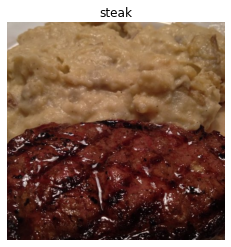

In [6]:
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
import random;

def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"the shape of the image is{img.shape}")
    return img

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")    

In [7]:
tf.constant(img).numpy()


array([[[185, 178, 168],
        [186, 179, 169],
        [186, 179, 169],
        ...,
        [176, 160, 145],
        [179, 163, 148],
        [174, 158, 143]],

       [[187, 180, 170],
        [186, 179, 169],
        [186, 179, 169],
        ...,
        [177, 161, 146],
        [179, 163, 148],
        [175, 159, 144]],

       [[187, 180, 170],
        [186, 179, 169],
        [185, 178, 168],
        ...,
        [181, 165, 150],
        [180, 164, 149],
        [178, 162, 147]],

       ...,

       [[ 38,  18,  19],
        [ 36,  16,  17],
        [ 34,  14,  15],
        ...,
        [ 58,  35,  27],
        [ 56,  36,  29],
        [ 57,  37,  30]],

       [[ 35,  13,  15],
        [ 35,  13,  15],
        [ 36,  14,  16],
        ...,
        [ 61,  39,  28],
        [ 61,  38,  30],
        [ 58,  35,  27]],

       [[ 37,  15,  17],
        [ 37,  15,  17],
        [ 36,  14,  16],
        ...,
        [ 59,  37,  26],
        [ 55,  32,  24],
        [ 46,  23,  15]]

In [8]:
img=img/255.0

In [9]:
img

array([[[0.7254902 , 0.69803922, 0.65882353],
        [0.72941176, 0.70196078, 0.6627451 ],
        [0.72941176, 0.70196078, 0.6627451 ],
        ...,
        [0.69019608, 0.62745098, 0.56862745],
        [0.70196078, 0.63921569, 0.58039216],
        [0.68235294, 0.61960784, 0.56078431]],

       [[0.73333333, 0.70588235, 0.66666667],
        [0.72941176, 0.70196078, 0.6627451 ],
        [0.72941176, 0.70196078, 0.6627451 ],
        ...,
        [0.69411765, 0.63137255, 0.57254902],
        [0.70196078, 0.63921569, 0.58039216],
        [0.68627451, 0.62352941, 0.56470588]],

       [[0.73333333, 0.70588235, 0.66666667],
        [0.72941176, 0.70196078, 0.6627451 ],
        [0.7254902 , 0.69803922, 0.65882353],
        ...,
        [0.70980392, 0.64705882, 0.58823529],
        [0.70588235, 0.64313725, 0.58431373],
        [0.69803922, 0.63529412, 0.57647059]],

       ...,

       [[0.14901961, 0.07058824, 0.0745098 ],
        [0.14117647, 0.0627451 , 0.06666667],
        [0.13333333, 0

In [10]:
from keras.preprocessing.image import ImageDataGenerator;
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 114ms/step - loss: 0.5577 - accuracy: 0.7060 - val_loss: 0.4194 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 4s 95ms/step - loss: 0.4230 - accuracy: 0.8127 - val_loss: 0.3260 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3831 - accuracy: 0.8293 - val_loss: 0.3065 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3581 - accuracy: 0.8433 - val_loss: 0.2965 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 100ms/step - loss: 0.3074 - accuracy: 0.8767 - val_loss: 0.3119 - val_accuracy: 0.8880


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

the shape of the image is(512, 512, 3)
the shape of the image is(512, 384, 3)


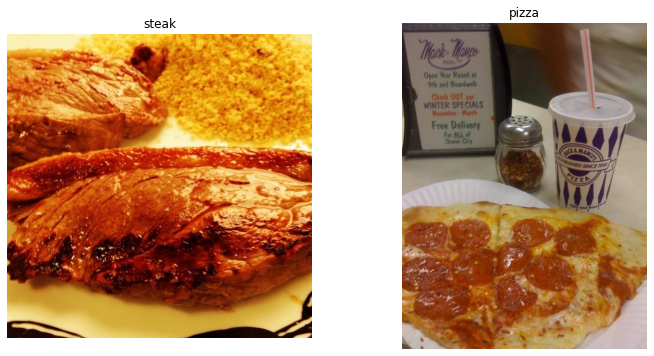

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
view_img1=view_random_image(target_dir="pizza_steak/train/",target_class="steak")
plt.subplot(1,2,2)
view_img2=view_random_image(target_dir="pizza_steak/test/",target_class="pizza")

In [14]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [15]:
images[3].shape

(224, 224, 3)

Text(0.5, 1.0, 'This is a steak')

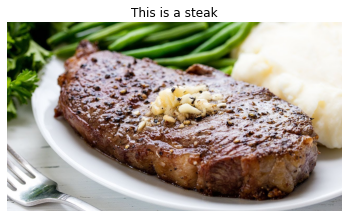

In [16]:
import matplotlib.image as mpimg;
import matplotlib.pyplot as plt;

steak=mpimg.imread("maxresdefault.jpg")
plt.imshow(steak)
plt.axis("off")
plt.title(f"This is a {class_names[1]}")

In [17]:
steak.shape,steak.ndim

((720, 1280, 3), 3)

In [18]:
steak=tf.image.resize(img,size=[224,224])
steak=steak/255

In [19]:
pred=model.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 136ms/step


In [20]:
pred_class=class_names[int(tf.round(pred))]
print(pred_class)

steak


Text(0.5, 1.0, 'This is a pizza')

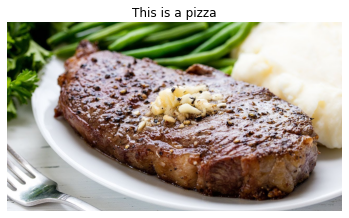

In [21]:
import matplotlib.image as mpimg;
import matplotlib.pyplot as plt;

image=mpimg.imread("maxresdefault.jpg")
plt.imshow(image)
plt.axis("off")
plt.title(f"This is a {class_names[0]}")

In [22]:
image.shape,image.ndim

((720, 1280, 3), 3)

In [23]:
image=tf.image.resize(img,size=(224,224))
image=image/255

In [24]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [25]:
pred=model.predict(tf.expand_dims(image,axis=0))

1/1 [==============================] - 0s 15ms/step


In [26]:
pred_class=class_names[int(tf.round(pred))]
print(pred_class)

steak


In [27]:
int(tf.round(pred))

1

In [28]:
def load_and_prep_image(filename,img_shape=224):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img

In [29]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis("off")
    

1/1 [==============================] - 0s 15ms/step


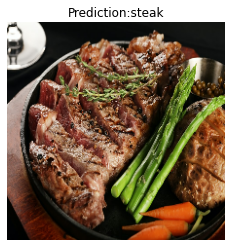

In [42]:
pred_and_plot(model,"photo-1546964124-0cce460f38ef.jpg")